# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akyon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)
btc_headlines["articles"][0]

{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Jeff Somers',
 'title': 'Is the Crypto Bubble Going to Burst?',
 'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
 'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg',
 'publishedAt': '2022-02-09T16:00:00Z',
 'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]'}

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)
eth_headlines["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Omar L. Gallaga',
 'title': 'Playing With Crypto? You’ll Need a Wallet (or Several)',
 'description': 'Buying and selling NFTs or transferring digital currency is going to require a little leap of faith. Here’s how to get started.',
 'url': 'https://www.wired.com/story/how-to-choose-set-up-crypto-wallet/',
 'urlToImage': 'https://media.wired.com/photos/620415899266d5d11c07b346/191:100/w_1280,c_limit/Gear-Coinbase-App-Screens.jpg',
 'publishedAt': '2022-02-10T14:00:00Z',
 'content': "If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there'd be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars]"}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc_df  = pd.DataFrame(sentiments)
btc_df.head()

,text,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
2,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
3,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815
4,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth_df  = pd.DataFrame(sentiments)
eth_df.head()

,text,Compound,Positive,Negative,Neutral
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.147830,0.088500,0.047600,0.863950
std,0.467917,0.059373,0.059001,0.062706
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.272000,0.045750,0.000000,0.829500
50%,0.220050,0.073000,0.000000,0.862500
75%,0.585900,0.145250,0.090250,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.054765,0.053050,0.030550,0.916450
std,0.361855,0.073697,0.049529,0.087686
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.102700,0.000000,0.000000,0.822500
50%,0.000000,0.019500,0.000000,0.942500
75%,0.152575,0.063250,0.059750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score, with a score of 0.088500

Q: Which coin had the highest compound score?

A: Etherium had the highest compound score, with a score of 0.834100

Q. Which coin had the highest positive score?

A: Etherium had the highest positive score, with a score of 0.234000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
print(stopwords.words('english'))
stop_words = set(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
      # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create Sentences
    sent = sent_tokenize(re_clean)
    
    # Create a tokenized list of the words
    words_tokenized = []
    words = []
    
    for word in sent:
        word = word_tokenize(word)
        words = word.append(words)

    
    # Convert the words to lowercase and remove stop words
    text = [word.lower() for word in text if word.lower() not in stop_words]
 
       
    # Lemmatize words into root words
    words = word_tokenize(re_clean)
    lematized = [wnl.lemmatize(word) for word in words]  
    tokens = [word.lower() for word in lematized if word.lower() not in stop_words]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = [tokenizer(words) for words in btc_df['text']]
btc_df['tokens'] = bitcoin_tokens
btc_df.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, arent, paying, attention, bitcoin, cryp..."
1,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
2,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, making, docuseries, one, worst, rapp..."
3,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[british, entrepreneur, financier, richard, od..."
4,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909,"[last, five, year, bitcoin, transferred, mr, l..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)
eth_df.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[technical, analysis, isnt, perfect, tool, may..."
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000,"[enables, l, platform, bootstrap, national, ec..."
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000,"[meansandends, moralist, nondoers, always, end..."
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[coinbase, reported, share, trading, volume, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
bitcoin_counts = ngrams(tokenizer(str(btc_df.text)), n=2)
btc_df_tokens = btc_df['tokens']
list(bitcoin_counts)

[('even', 'arent'),
 ('arent', 'paying'),
 ('paying', 'attention'),
 ('attention', 'bitcoin'),
 ('bitcoin', 'israeli'),
 ('israeli', 'national'),
 ('national', 'tal'),
 ('tal', 'prihar'),
 ('prihar', 'pled'),
 ('pled', 'guilty'),
 ('guilty', 'rou'),
 ('rou', 'netflixrn'),
 ('netflixrn', 'making'),
 ('making', 'docuseries'),
 ('docuseries', 'one'),
 ('one', 'british'),
 ('british', 'entrepreneur'),
 ('entrepreneur', 'financier'),
 ('financier', 'richard'),
 ('richard', 'ode'),
 ('ode', 'last'),
 ('last', 'five'),
 ('five', 'year'),
 ('year', 'tho'),
 ('tho', 'even'),
 ('even', 'cyberspace'),
 ('cyberspace', 'department'),
 ('department', 'justice'),
 ('justice', 'couple'),
 ('couple', 'would'),
 ('would', 'never'),
 ('never', 'flee'),
 ('flee', 'country'),
 ('country', 'reuters'),
 ('reuters', 'staffrnjan'),
 ('staffrnjan', 'reuters'),
 ('reuters', 'us'),
 ('us', 'sundays'),
 ('sundays', 'super'),
 ('super', 'bowl'),
 ('bowl', 'ad'),
 ('ad', 'indication'),
 ('indication', 'news'),
 ('ne

In [17]:
# Generate the Ethereum N-grams where N=2
eth_counts = ngrams(tokenizer(str(eth_df.text)), n=2)
list(eth_counts)

[('people', 'buy'),
 ('buy', 'cryptocurrencies'),
 ('cryptocurrencies', 'intended'),
 ('intended', 'technical'),
 ('technical', 'analysis'),
 ('analysis', 'isnt'),
 ('isnt', 'perfect'),
 ('perfect', 'tool'),
 ('tool', 'enables'),
 ('enables', 'l'),
 ('l', 'platform'),
 ('platform', 'bootstrap'),
 ('bootstrap', 'n'),
 ('n', 'meansandends'),
 ('meansandends', 'moralist'),
 ('moralist', 'nondoers'),
 ('nondoers', 'al'),
 ('al', 'coinbase'),
 ('coinbase', 'reported'),
 ('reported', 'share'),
 ('share', 'trading'),
 ('trading', 'vo'),
 ('vo', 'people'),
 ('people', 'colorado'),
 ('colorado', 'able'),
 ('able', 'pay'),
 ('pay', 'illustration'),
 ('illustration', 'james'),
 ('james', 'bareham'),
 ('bareham', 'vergern'),
 ('vergern', 'last'),
 ('last', 'night'),
 ('night', 'twitter'),
 ('twitter', 'announced'),
 ('announced', 'itll'),
 ('itll', 'allow'),
 ('allow', 'user'),
 ('user', 'feb'),
 ('feb', 'reuters'),
 ('reuters', 'polygon'),
 ('polygon', 'decentralized'),
 ('decentralized', 'sca'),

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(str(btc_df.text))
token_count(btc_tokens, 10)

[('bitcoin', 7),
 ('reuters', 7),
 ('feb', 5),
 ('one', 3),
 ('even', 2),
 ('arent', 1),
 ('paying', 1),
 ('attention', 1),
 ('israeli', 1),
 ('national', 1)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(str(eth_df.text))
token_count(eth_tokens, 10)

[('feb', 4),
 ('reuters', 4),
 ('online', 3),
 ('version', 3),
 ('article', 3),
 ('wa', 3),
 ('published', 3),
 ('tim', 3),
 ('people', 2),
 ('thief', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

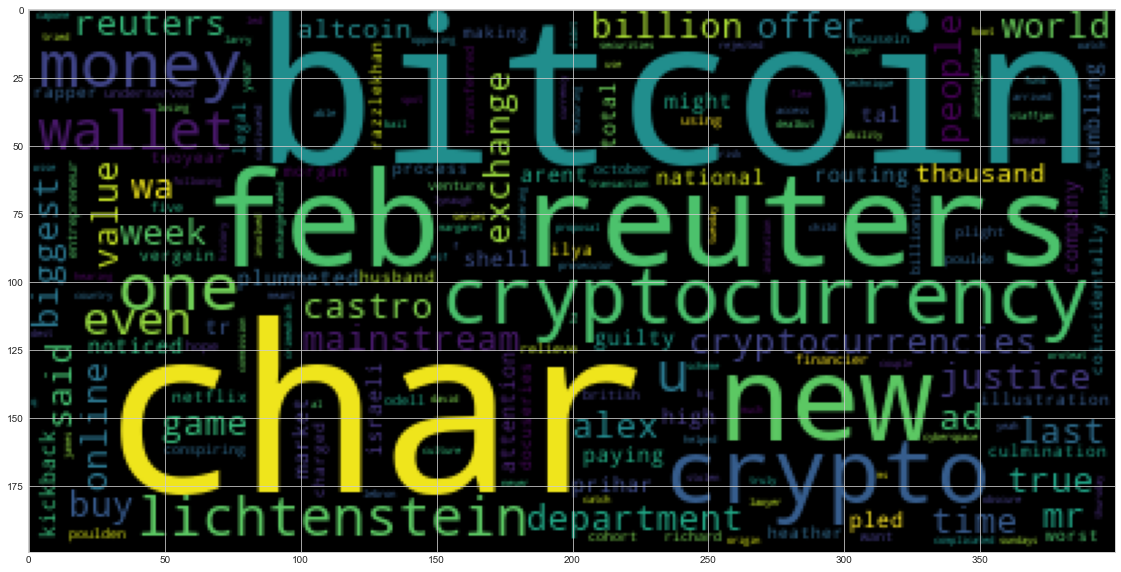

In [22]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_df['text'])
input_text = tokenizer(big_string)
wc_text = ' '.join(input_text)
wc = WordCloud().generate(wc_text)
plt.imshow(wc)

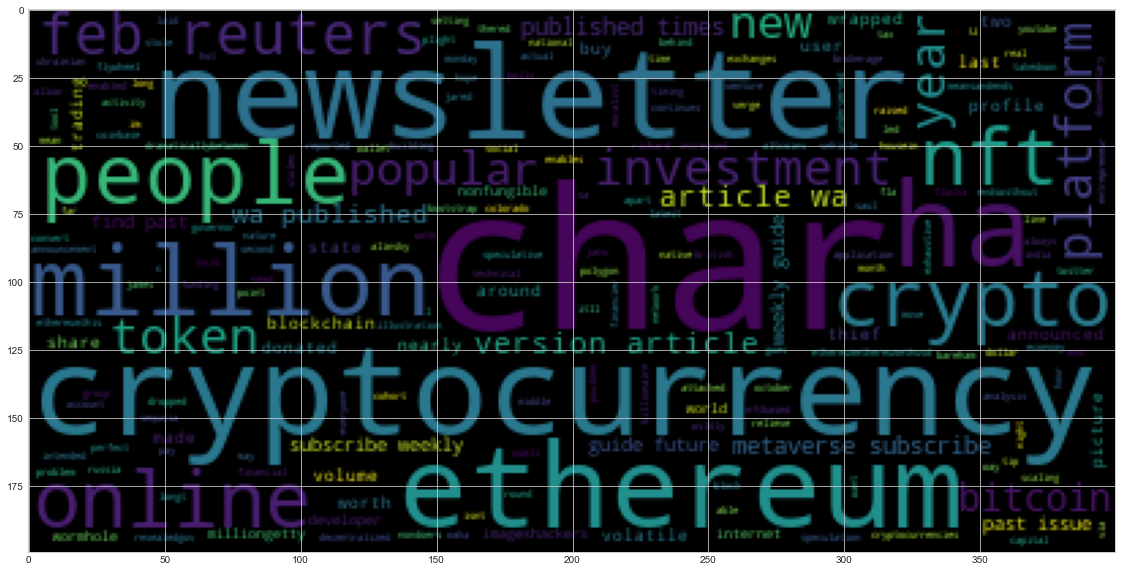

In [23]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_df['text'])
input_text = tokenizer(big_string)
wc_text = ' '.join(input_text)
wc = WordCloud().generate(wc_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
concat_btc = btc_df.text.str.cat()
concat_btc

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved cohort: Bitcoin billionaires who want to buy a house.\r\nIn October, Poulde… [+3364 chars]Over the last five years, about 25,000 of those Bitcoin were transferred out of Mr. Lichtensteins wallet using a complicated series o

In [28]:
# Run the NER processor on all of the text
ner_btc = nlp(concat_btc)

# Add a title to the document
ner_btc.user_data["title"] = "NER for BTC"

In [29]:
# Render the visualization
displacy.render(ner_btc, style='ent')

In [30]:
# List all Entities
for entity in ner_btc.ents:
    print(entity.text, entity.label_)

last week DATE
3 MONEY
Tal Prihar PERSON
Alex Castro PERSON
The Verge
 ORG
two-year DATE
about one CARDINAL
Morgan PERSON
Ilya Lichtenstein PERSON
this week DATE
Richard ODell Poulden PERSON
October DATE
Poulde GPE
the last five years DATE
about 25,000 CARDINAL
Bitcoin PERSON
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone PERSON
Margaret Lynaugh PERSON
Reuters ORG
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
Larry David PERSON
LeBron James PERSON
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one CARDINAL
2020 DATE
1 CARDINAL
Reuters ORG
thousands CARDINAL
202 CARDINAL
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
GMT ORG
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
22 CARDINAL
Reuters ORG
2021 DATE
thousands CARDINAL
YouTube ORG
Alex Castro PERSON
The Verge
 ORG
BitConnect ORG
Bitcoin PERSON
Bloombergs ORG
Lorcan NORP
first ORDINAL
the 21st cen DATE
15 CA

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_df['text'])

In [32]:
# Run the NER processor on all of the text
ner_eth = nlp(eth_text)

# Add a title to the document
ner_eth.user_data["title"] = "NER for ETH"

In [33]:
# Render the visualization
displacy.render(ner_eth, style='ent')

In [34]:
# List all Entities
for entity in ner_eth.ents:
    print(entity.text, entity.label_)

Ethereum ORG
Ethereum  PERSON
ETH-USD ORG
-- Saul Alinsky Coinbase PERSON
last year DATE
Between 2020 and 2021 DATE
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
James Bareham PERSON
More than $15 million MONEY
Ukrainian GPE
Russia GPE
Twitter PERSON
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
Janu PERSON
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
two hours TIME
YouTube ORG
"Line Goes Up The Problem With NFTs" WORK_OF_ART
Waka Flacka Fla ORG
British NORP
Richard ODell Poulden PERSON
October DATE
Poulde GPE
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
GMT ORG
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
Into PERSON
weekly DATE
Vita PERSON
Into PERSON
weekly DATE
Into PERSON
weekly DATE
Last wee DATE
Reuters 

---